In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

<IPython.core.display.Javascript object>


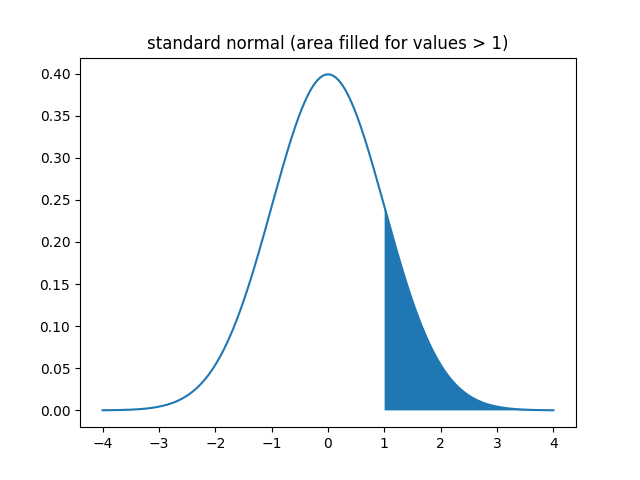

Text(0.5, 1.0, 'standard normal (area filled for values > 1)')

In [36]:
std_normal_x = np.linspace(-4,4, 1000)
std_normal_y = stats.norm.pdf(std_normal_x)
x_fill = np.argwhere(std_normal_x>1)[0][0]
plt.plot(std_normal_x,std_normal_y)
plt.fill_between(std_normal_x[x_fill::],std_normal_y[x_fill::])
plt.title("standard normal (area filled for values > 1)")